In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

local_path = '/Users/frank/PGM/Score-matching-project-'
sys.path.append(local_path)

%load_ext autoreload
%autoreload 2

import dataset
from dataset.sampling import dicrete
from dataset import sampling, densities, scores, visualisation
import score_matching
from score_matching import toy_models, learning_objectives, score_visualisation

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# GMM

In [3]:
# Parameters
N = 10000
mus = [np.array([0, 0]), np.array([10,10])]
sigmas = [np.eye(2), np.eye(2)]
alphas = [0.5, 0.5]

In [4]:
gmm_data, clusters = sampling.gaussian_mixture_sampling(mus, sigmas, alphas, N)

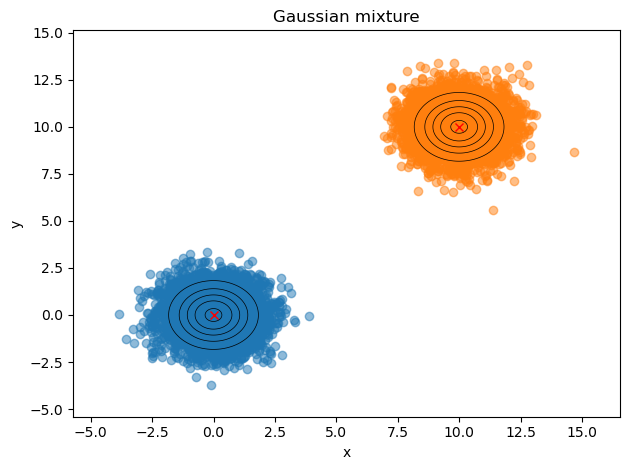

In [5]:
visualisation.plot_GMM(gmm_data, clusters, mus, sigmas, alphas)

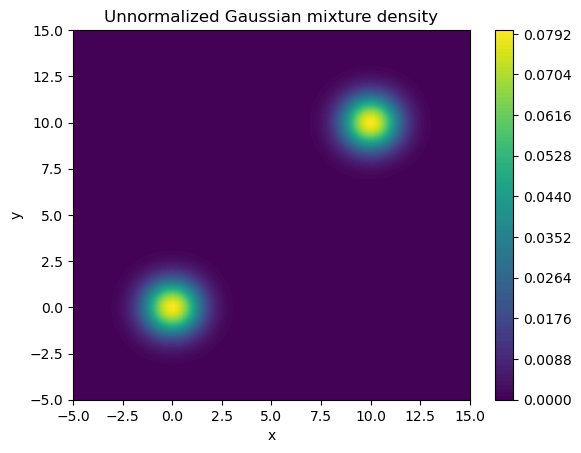

In [6]:
visualisation.gmm_density_heatmap(densities.gmm_density, mus, sigmas, alphas)

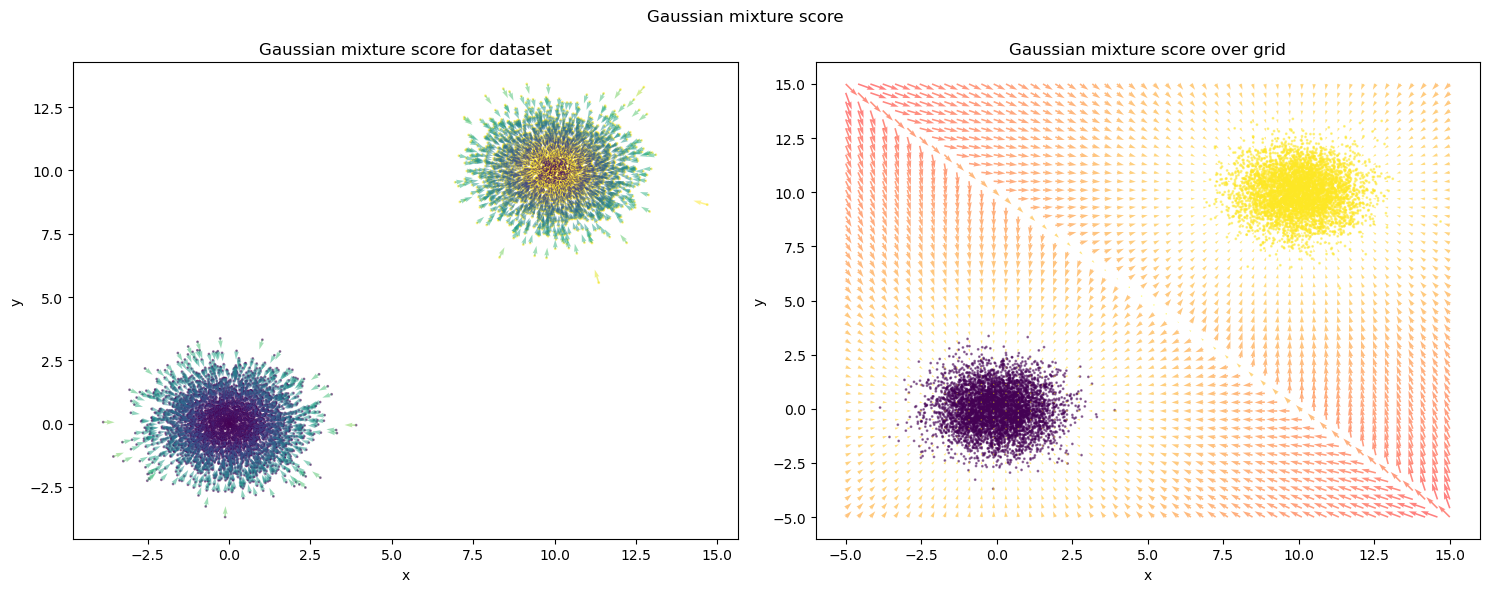

In [7]:
visualisation.gmm_score_plot(data=gmm_data, clusters=clusters, mus=mus, sigmas=sigmas, alphas=alphas)

# Banana-shaped data

In [8]:
# Parameters
N = 10000
mu_banana = np.array([0, 0])
sigma_banana = np.eye(2)

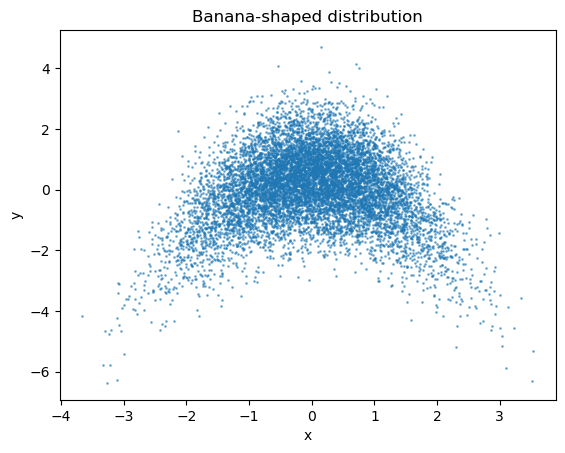

In [9]:
banana_data = sampling.banana_shaped_sampling(N, mu_banana, sigma_banana)

visualisation.plot_banana(banana_data)

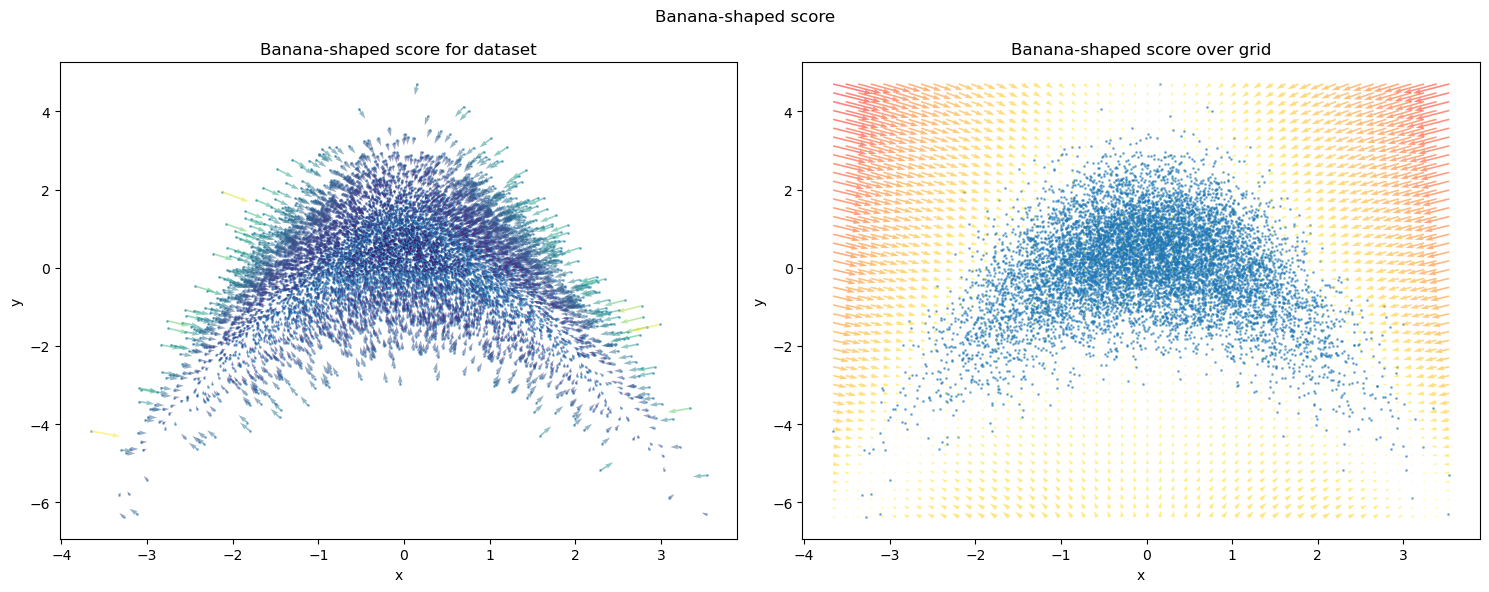

In [10]:
visualisation.banana_score_plot(banana_data)

In [2]:
echantillonneur = dicrete(center_star=[0,0], size_star = 1, m_start = 250, scale=0.001)
echantillons, clusters = echantillonneur.echantillonne_avec_clusters(1000)

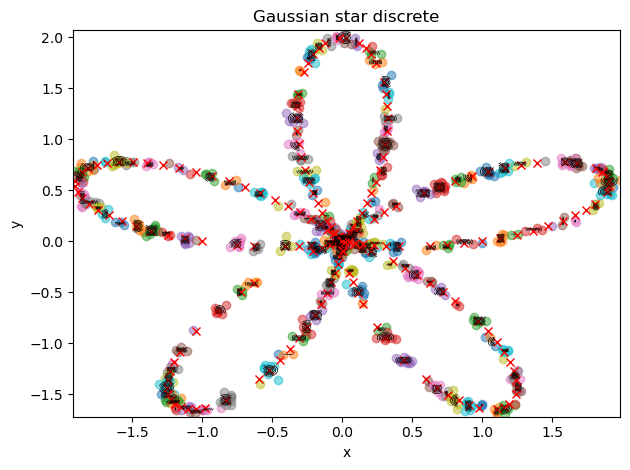

In [12]:
visualisation.plot_start(echantillonneur, echantillons, clusters)

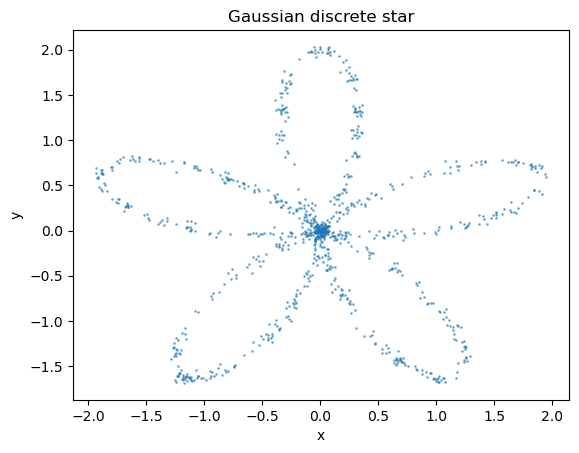

In [8]:

echantillonneur.gmm_score_plot(echantillons)


In [ ]:
scores_vec = sampling.gradient_log_start(echantillons, echantillonneur.poids, echantillonneur.Y_star, echantillonneur.covariances) 
sampling.plot_gaussian_mixture_scores(echantillons, scores_vec)

: 